# Rock-Paper-Scissors Images


## if you want to use google collab you can turn off the comment '#' from the code below.

## ctrl + a then ctrl + / . Run it


In [6]:
# from google.colab import files
# uploaded = files.upload()
# !mkdir -p ~/.kaggle
# !mv kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d drgfreeman/rockpaperscissors
# !unzip -q rockpaperscissors.zip

In [7]:
# Library imports
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Use ImageDataGenerator to generate images that want to train and test or validate


In [8]:
image_dir = "data/rockpaperscissors/rps-cv-images"
train_datagen = ImageDataGenerator(
    rescale=1 / 255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2,
)

validation_datagen = ImageDataGenerator(rescale=1 / 255.0, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    class_mode="categorical",
    subset="training",
)

validation_generator = validation_datagen.flow_from_directory(
    image_dir,
    target_size=(150, 150),
    class_mode="categorical",
    subset="validation",
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


## Create Model using Conv2D, MaxPooling2D, and Neural Network


In [9]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.8),
        tf.keras.layers.Dense(3, activation="softmax"),
    ]
)

# Summary model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

## Train the model


In [10]:
model.compile(
    optimizer=tf.optimizers.RMSprop(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get("accuracy") >= 0.97 and logs.get("val_accuracy") >= 0.97:
            self.model.stop_training = True


callbacks = [MyCallback()]
history = model.fit(
    train_generator,
    epochs=1000,
    batch_size=32,
    steps_per_epoch=7,
    validation_data=validation_generator,
    callbacks=callbacks,
)

Epoch 1/1000
7/7 [==============================] - 18s 2s/step - loss: 1.0976 - accuracy: 0.3674 - val_loss: 1.1050 - val_accuracy: 0.3455
Epoch 2/1000
7/7 [==============================] - 14s 2s/step - loss: 1.1049 - accuracy: 0.3973 - val_loss: 1.0981 - val_accuracy: 0.3432
Epoch 3/1000
7/7 [==============================] - 16s 2s/step - loss: 1.1076 - accuracy: 0.3214 - val_loss: 1.0831 - val_accuracy: 0.3684
Epoch 4/1000
7/7 [==============================] - 12s 2s/step - loss: 1.0950 - accuracy: 0.3616 - val_loss: 1.0812 - val_accuracy: 0.4645
Epoch 5/1000
7/7 [==============================] - 14s 2s/step - loss: 1.0915 - accuracy: 0.3571 - val_loss: 1.0737 - val_accuracy: 0.5378
Epoch 6/1000
7/7 [==============================] - 20s 3s/step - loss: 1.0904 - accuracy: 0.3750 - val_loss: 1.0653 - val_accuracy: 0.5057
Epoch 7/1000
7/7 [==============================] - 15s 2s/step - loss: 1.0924 - accuracy: 0.3750 - val_loss: 1.0563 - val_accuracy: 0.5378
Epoch 8/1000
7/7 [==

## save the model to .h5


In [11]:
model.save("my_model.h5")

c:\Users\iwan1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## predict the picture


In [13]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


1/1 [==============================] - 0s 214ms/step
Paper


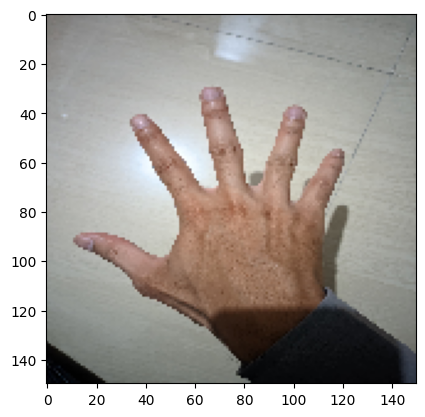

In [69]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

path = "File_Test/Paper_2.jpg"
img = load_img(path, target_size=(150, 150))
show_image = plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
model = load_model("my_model.h5")  # Load the model from the file
classes = model.predict(images, batch_size=10)
if np.argmax(classes) == 0:
    print("Paper")
elif np.argmax(classes) == 1:
    print("Rock")
elif np.argmax(classes) == 2:
    print("Scissor")